In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [13]:
path=r'C:\Users\User\Desktop\Irisdataset\iris.csv'
iris=pd.read_csv(path)
del iris['Unnamed: 0']

In [14]:
##normalization
for i in iris.columns[0:4]:
    iris[i]= iris[i].apply(lambda x:(x-iris[i].mean())/ iris[i].std())

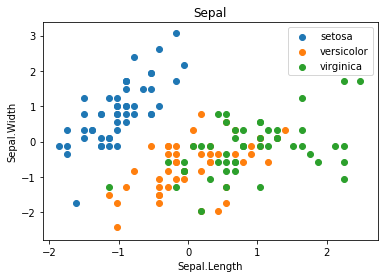

In [15]:
plt.scatter(iris[iris.Species=='setosa']['Sepal.Length'],iris[iris.Species=='setosa']['Sepal.Width'],label='setosa')
plt.scatter(iris[iris.Species=='versicolor']['Sepal.Length'],iris[iris.Species=='versicolor']['Sepal.Width'],label='versicolor')
plt.scatter(iris[iris.Species=='virginica']['Sepal.Length'],iris[iris.Species=='virginica']['Sepal.Width'],label='virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal')
plt.legend(loc='upper right')
plt.show()

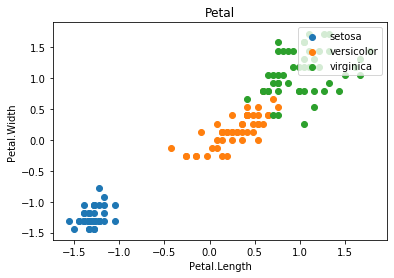

In [16]:
plt.scatter(iris[iris.Species=='setosa']['Petal.Length'],iris[iris.Species=='setosa']['Petal.Width'],label='setosa')
plt.scatter(iris[iris.Species=='versicolor']['Petal.Length'],iris[iris.Species=='versicolor']['Petal.Width'],label='versicolor')
plt.scatter(iris[iris.Species=='virginica']['Petal.Length'],iris[iris.Species=='virginica']['Petal.Width'],label='virginica')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.title('Petal')
plt.legend(loc='upper right')
plt.show()

In [17]:
def compare(n1,n2,n3):
    if (n1>n2)&(n1>n3):
        return 'setosa'
    elif (n2>n3)&(n2>n1):
        return 'versicolor'
    elif (n3>n1)&(n3>n2):
        return 'virginica'
    else:
        return np.nan

In [18]:
def knnclassifier(x,y,n):
    n_setosa=0
    n_versicolor=0
    n_virginica=0
    for i in range(len(iris)):
        dx=iris['Sepal.Length'][i]-x
        dy=iris['Sepal.Width'][i]-y
        d=math.sqrt(dx**2+dy**2)
        if d<=n:
            if iris['Species'][i]=='setosa':
                n_setosa+=1/d
            elif iris['Species'][i]=='versicolor':
                n_versicolor+=1/d
            elif iris['Species'][i]=='virginica':
                n_virginica+=1/d
    return compare(n_setosa,n_versicolor,n_virginica)
            

In [35]:
x=np.arange(iris['Sepal.Length'].min(),iris['Sepal.Length'].max(),0.004)
y=np.arange(iris['Sepal.Width'].min(),iris['Sepal.Width'].max(),0.004)
test=[[]]
for i in x:
    for v in y:
        test.append([i,v])

In [36]:
len(x)

1087

In [37]:
test=pd.DataFrame(test,columns=['x','y'])
test=test.dropna()

In [38]:
_species=[]
all=len(test)
i=0
for index,x,y in test.itertuples():
    _species.append(knnclassifier(x,y,0.5))
    #显示进度
    percent='{:.2%}'.format(i/all)
    i+=1
    print('\r %s' % (percent),end='')
print('\r %s' % ('completed'))

 completed


In [39]:
test['_species']=_species

In [40]:
test=test.dropna()
test.groupby(test['_species']).size()

_species
setosa        390335
versicolor    316650
virginica     397606
dtype: int64

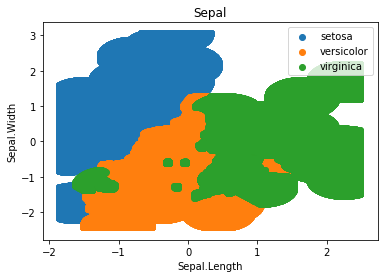

In [41]:
plt.scatter(test[test._species=='setosa']['x'],test[test._species=='setosa']['y'],label='setosa')
plt.scatter(test[test._species=='versicolor']['x'],test[test._species=='versicolor']['y'],label='versicolor')
plt.scatter(test[test._species=='virginica']['x'],test[test._species=='virginica']['y'],label='virginica')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Sepal')
plt.legend(loc='upper right')
plt.show()

In [44]:
test.to_csv('iris_knnclassifier')